In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("names/yob1880.txt",encoding=None,header=None)
print(data[[0,2]].iloc[0])

0    Mary
2    7065
Name: 0, dtype: object


In [14]:
namespop = []
count = 0
for i in range(1880,2019):
    count += 1
    fname = f"names/yob{i}.txt"
    data = pd.read_csv(fname,encoding=None,header=None)
    name = data[0].iloc[0]
    number = data[2].iloc[0]
    year = i
    value = [name,year,number]
    if count == 1:
        namespop.append(value)
    if count > 1:
        if name != namespop[-1][0]:
            namespop.append(value)

dframe = pd.DataFrame(np.array(namespop))
print(len(dframe[1]))
    


13


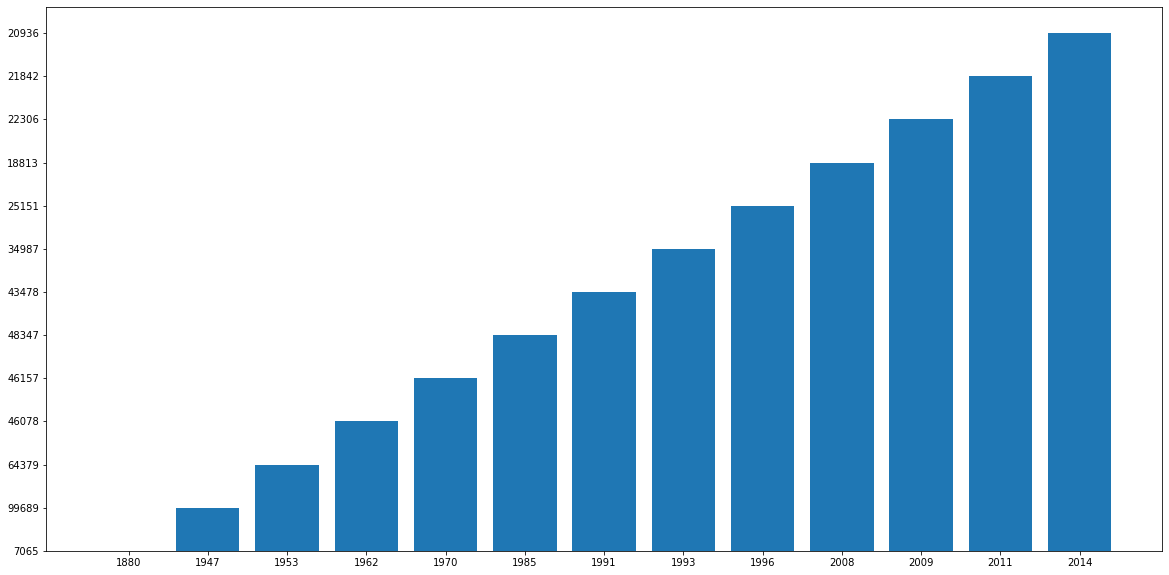

In [23]:
plt.bar(dframe[1],dframe[2])
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

In [25]:
names_all = []

for year in range(1880, 2018 + 1):
    names_all.append(pd.read_csv('names/yob{}.txt'.format(year), names=['name', 'sex', 'number']))
    names_all[-1]['year'] = year

allyears = pd.concat(names_all)

In [35]:
allyears_indexed = allyears.set_index(['sex', 'name', 'year']).sort_index()


In [36]:
def topten(sex, year):
    simple = allyears_indexed.loc[sex, :, year].sort_values('number', ascending = False).reset_index()
    simple = simple.drop(['sex', 'year', 'number'], axis = 1).head(10)
    
    simple.columns = [year]
    simple.index = simple.index + 1
    
    return simple

In [39]:
names_by_sex = allyears.groupby(['name', 'sex'])['number'].sum().unstack(fill_value = 0)
names_by_sex.head()

sex,F,M
name,,
Aaban,0,114
Aabha,35,0
Aabid,0,16
Aabidah,5,0
Aabir,0,10


In [40]:
names_ratio = names_by_sex.copy()
names_ratio['total'] = names_ratio.sum(axis = 1)
names_ratio['ratio'] = names_ratio['F'] / names_ratio['M']
names_ratio.head()

sex,F,M,total,ratio
name,,,,
Aaban,0,114,114,0.0
Aabha,35,0,35,inf
Aabid,0,16,16,0.0
Aabidah,5,0,5,inf
Aabir,0,10,10,0.0


In [41]:
unisex_bool_mask = (names_ratio.loc[:, 'ratio'] > 0.25) & (names_ratio.loc[:, 'ratio'] < 4)
unisex = names_ratio[unisex_bool_mask].copy()
unisex.sort_values('total', ascending = False, inplace = True)
unisex.head(10)

sex,F,M,total,ratio
name,,,,
Willie,146156,448946,595102,0.325554
Jordan,131004,374513,505517,0.349798
Taylor,320446,110390,430836,2.902854
Leslie,267081,112726,379807,2.369294
Jamie,268102,85631,353733,3.130899
Angel,95710,231800,327510,0.412899
Lee,62143,231130,293273,0.268866
Jessie,167462,110212,277674,1.519453
Marion,188391,72075,260466,2.613819
